In [1]:
getwd()

[1] "/Users/csyk2/Python/bioinformatics/bioinformatics_data_skills/bds-files/chapter-08-r"

In [2]:
# the dataset here is published on a 2006 paper 'The influence of recombination on human genetic diversity'
# it is few advantages:
# 1. very tidy raw data for analysis
# 2. open source
# 3. could compare my results with author's result

d <- read.csv('Dataset_S1.txt')

In [3]:
# read the first 3 lines of the dataset, get familiar with the header
head(d, n=3)

,start,end,total.SNPs,total.Bases,depth,unique.SNPs,dhSNPs,reference.Bases,Theta,Pi,Heterozygosity,X.GC,Recombination,Divergence,Constraint,SNPs
1,5.500100e+04,5.600000e+04,0.000000e+00,1.894000e+03,3.410000e+00,0.000000e+00,0.000000e+00,5.560000e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.480960e+01,9.601574e-03,3.006012e-03,0.000000e+00,0.000000e+00
2,5.600100e+04,5.700000e+04,5.000000e+00,6.683000e+03,6.680000e+00,2.000000e+00,2.000000e+00,1.000000e+03,8.007000e+00,1.035400e+01,7.481000e+00,4.244240e+01,9.601574e-03,1.801802e-02,0.000000e+00,0.000000e+00
3,5.700100e+04,5.800000e+04,1.000000e+00,9.063000e+03,9.060000e+00,1.000000e+00,0.000000e+00,1.000000e+03,3.510000e+00,1.986000e+00,1.103000e+00,3.723720e+01,9.601574e-03,7.007007e-03,0.000000e+00,0.000000e+00


In [4]:
# dataset dimension, and row names in header
dim(d)
colnames(d)
# notice that the name of %GC is changed into X.GC

[1] 59140    16

[1] "start"           "end"             "total.SNPs"      "total.Bases"    
 [5] "depth"           "unique.SNPs"     "dhSNPs"          "reference.Bases"
 [9] "Theta"           "Pi"              "Heterozygosity"  "X.GC"           
[13] "Recombination"   "Divergence"      "Constraint"      "SNPs"

In [5]:
# fix the row name error in header
colnames(d)[12] <- 'percentage.GC'

In [6]:
# a quick summary of reading depth
summary(d$depth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.970   8.170   8.184   9.400  21.910 

In [8]:
# ways to slice a dataset in R, similar with Pandas
head(d[, 1:2])

,start,end
1,55001,56000
2,56001,57000
3,57001,58000
4,58001,59000
5,59001,60000
6,60001,61000


In [10]:
# ways to slice a dataset in R, similar with Pandas
head(d[, c('start', 'end')])

,start,end
1,55001,56000
2,56001,57000
3,57001,58000
4,58001,59000
5,59001,60000
6,60001,61000


In [11]:
# ways to slice a dataset in R, similar with Pandas
d[1, ]

,start,end,total.SNPs,total.Bases,depth,unique.SNPs,dhSNPs,reference.Bases,Theta,Pi,Heterozygosity,percentage.GC,Recombination,Divergence,Constraint,SNPs
1,5.500100e+04,5.600000e+04,0.000000e+00,1.894000e+03,3.410000e+00,0.000000e+00,0.000000e+00,5.560000e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.480960e+01,9.601574e-03,3.006012e-03,0.000000e+00,0.000000e+00


In [17]:
# slice out a dataframe from a dataframe, unlike the cells above, slicing into vectors
head(d[, 'start', drop=FALSE])

,start
1,55001
2,56001
3,57001
4,58001
5,59001
6,60001


In [18]:
# slice out the position of the chromosome 20 centromere (25'800'000 to 29'700'000)
# just like fancy indexing in numpy
d$cent <- d$start >= 25800000 & d$end <= 29700000

In [20]:
head(d$cent)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [19]:
table(d$cent)


FALSE  TRUE 
58455   685 

In [21]:
# rescale the nucleotide diversity from Pi to variation per basepair
d$diversity <- d$Pi / (10*1000)

In [22]:
# average nucleotide diversity per basepair is around 0.12% here
# sanity check: average nucleotide diversity: 1/1000
summary(d$diversity)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0005577 0.0010420 0.0012390 0.0016880 0.0265300 

In [23]:
# exploring SNPs
summary(d$total.SNPs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   7.000   8.906  12.000  93.000 

In [24]:
# find window with >85 SNPs
d[d$total.SNPs >= 85,]

,start,end,total.SNPs,total.Bases,depth,unique.SNPs,dhSNPs,reference.Bases,Theta,Pi,Heterozygosity,percentage.GC,Recombination,Divergence,Constraint,SNPs,cent,diversity
2567,2.621001e+06,2.622000e+06,9.300000e+01,1.133700e+04,1.134000e+01,1.300000e+01,1.000000e+01,1.000000e+03,4.342000e+01,5.092600e+01,8.158900e+01,4.394390e+01,7.065360e-04,1.701702e-02,0.000000e+00,1.000000e+00,0.000000e+00,5.092600e-03
12968,1.302300e+07,1.302400e+07,8.800000e+01,1.178400e+04,1.178000e+01,1.100000e+01,1.000000e+00,1.000000e+03,3.341300e+01,1.903000e+01,7.483800e+01,2.882880e+01,8.260000e-05,1.401401e-02,0.000000e+00,1.000000e+00,0.000000e+00,1.903000e-03
43165,4.735600e+07,4.735700e+07,8.700000e+01,1.250500e+04,1.250000e+01,9.000000e+00,7.000000e+00,1.000000e+03,2.962100e+01,2.710800e+01,6.957300e+01,4.674670e+01,5.005770e-04,2.002002e-02,0.000000e+00,7.000000e+00,0.000000e+00,2.710800e-03


In [25]:
# find window with high necleotide diversity and high GC content
d[d$Pi > 16 & d$percentage.GC > 80, ]

,start,end,total.SNPs,total.Bases,depth,unique.SNPs,dhSNPs,reference.Bases,Theta,Pi,Heterozygosity,percentage.GC,Recombination,Divergence,Constraint,SNPs,cent,diversity
58550,6.309700e+07,6.309800e+07,5.000000e+00,9.470000e+02,2.390000e+00,2.000000e+00,1.000000e+00,3.970000e+02,3.754400e+01,4.117200e+01,5.278400e+01,8.208210e+01,7.813260e-04,3.826531e-02,2.260000e+02,1.000000e+00,0.000000e+00,4.117200e-03
58641,6.318800e+07,6.318900e+07,2.000000e+00,1.623000e+03,3.210000e+00,2.000000e+00,0.000000e+00,5.060000e+02,1.643600e+01,1.643600e+01,1.232700e+01,8.238240e+01,3.473820e-04,1.678657e-02,1.480000e+02,0.000000e+00,0.000000e+00,1.643600e-03
58642,6.318900e+07,6.319000e+07,5.000000e+00,1.395000e+03,1.890000e+00,3.000000e+00,2.000000e+00,7.380000e+02,3.505200e+01,4.109900e+01,3.584200e+01,8.058060e+01,3.473820e-04,1.793722e-02,0.000000e+00,0.000000e+00,0.000000e+00,4.109900e-03


In [29]:
# see if GC content affect the reading depth
summary(d$depth[d$percentage.GC >= 80])
summary(d$depth[d$percentage.GC < 80])
# seems like there is a difference

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.05    1.89    2.14    2.24    2.78    3.37 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.970   8.170   8.185   9.400  21.910 

In [30]:
# however, there is not so many DNA regions have high GC content (>= 80%)
sum(d$percentage.GC >= 80)

[1] 9

In [32]:
# see if centrosome region has higher nucleotide diversity
summary(d$Pi[d$cent])
summary(d$Pi[!d$cent])
# seems like so

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.95   16.08   20.41   27.36  194.40 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.557  10.370  12.290  16.790 265.300 

In [33]:
# select min and max
d[which.min(d$depth),]
d[which.max(d$depth),]

,start,end,total.SNPs,total.Bases,depth,unique.SNPs,dhSNPs,reference.Bases,Theta,Pi,Heterozygosity,percentage.GC,Recombination,Divergence,Constraint,SNPs,cent,diversity
1180,1.234001e+06,1.235000e+06,0.000000e+00,4.440000e+02,1.000000e+00,0.000000e+00,0.000000e+00,4.440000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.483480e+01,1.364000e-04,2.002107e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


,start,end,total.SNPs,total.Bases,depth,unique.SNPs,dhSNPs,reference.Bases,Theta,Pi,Heterozygosity,percentage.GC,Recombination,Divergence,Constraint,SNPs,cent,diversity
8718,8.773001e+06,8.774000e+06,5.800000e+01,2.191400e+04,2.191000e+01,7.000000e+00,4.000000e+00,1.000000e+03,1.767600e+01,1.419900e+01,2.658100e+01,3.933930e+01,1.990459e-03,1.601602e-02,0.000000e+00,1.000000e+00,0.000000e+00,1.419900e-03


In [52]:
# import ggplot for plotting
library(ggplot2)

In [58]:
# define position
d$position <- (d$end + d$start) / 2

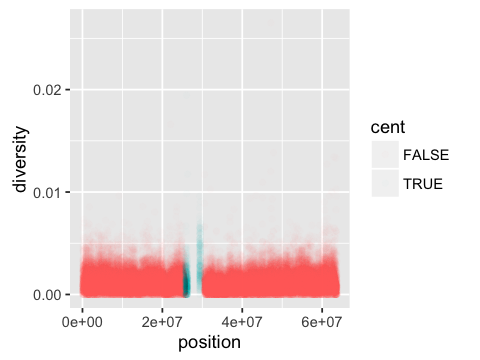

In [75]:
# there appears to be some bug so that figures cannot be directly plotted in jupyter notebook, fixed now.
# plot out the nucleotide diversity along chr20 positions
ggplot(d) + geom_point(aes(x=position, y=diversity, color=cent), alpha=0.01)

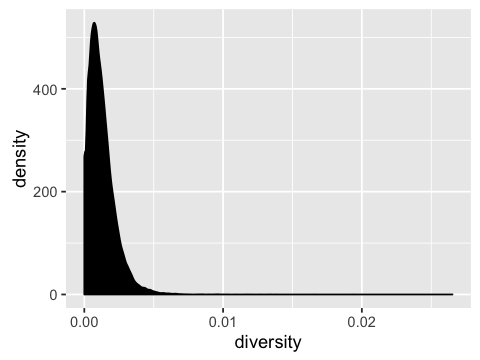

In [70]:
# density of diversiyt across all positions
ggplot(d) + geom_density(aes(diversity), fill='black')

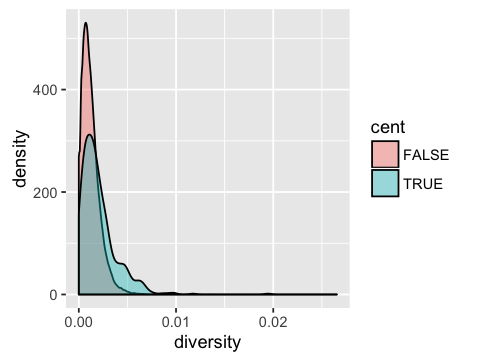

In [72]:
# plot the difference of diversity between centrosome region and non-centrosome region
ggplot(d) + geom_density(aes(x=diversity, fill=cent), alpha=0.4)

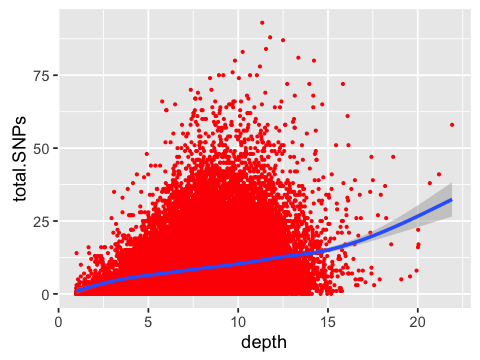

In [80]:
# see if there is correlation between sequencing depth and total SNPs
ggplot(d, aes(x=depth, y=total.SNPs)) + geom_point(size=0.5, color='red') + geom_smooth()
# higher sequencing depth increases the power to detect and call SNPs, no surprise

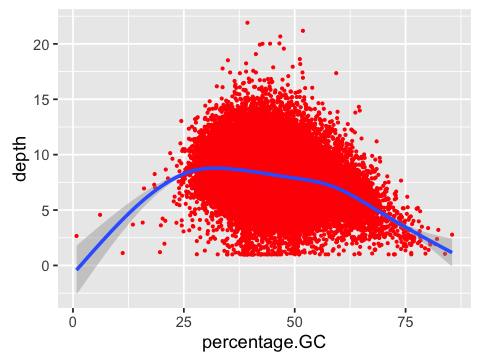

In [81]:
# test if high GC content correlates with lower sequencing depth
ggplot(d, aes(x=percentage.GC, y=depth)) + geom_point(size=0.5, color='red') + geom_smooth()
# yes, there is a trend there, no suprise

In [89]:
# binning data for histogram
d$GC.binned <- cut(d$percentage.GC, 5)
table(d$GC.binned)


(0.716,17.7]  (17.7,34.7]  (34.7,51.6]  (51.6,68.5]  (68.5,85.6] 
           6         4976        45784         8122          252 

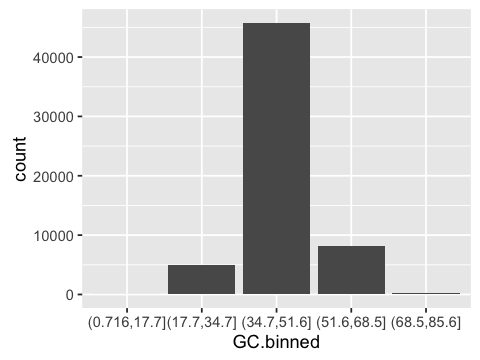

In [90]:
# plot out the histogram
ggplot(d) + geom_bar(aes(x=GC.binned))

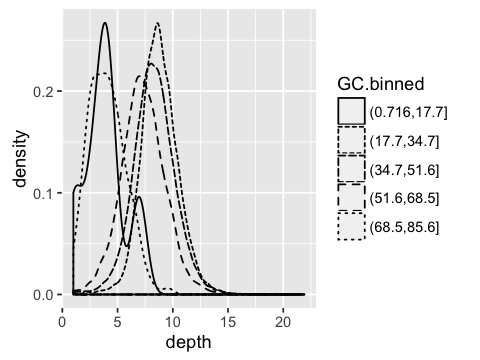

In [91]:
# another plot to show that higher GC content correlates with lower sequencing depth
ggplot(d) + geom_density(aes(x=depth, linetype=GC.binned), alpha=0.5)